In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from matplotlib.ticker import StrMethodFormatter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
sample = pd.read_csv('/content/drive/MyDrive/CapstoneProject/Datasets/Bathing_water_data/samples.csv')
sample.head()

,EUBWID,label,sampleTime,intestinalEnterococciQualifier,intestinalEnterococciCount,escherichiaColiQualifier,escherichiaColiCount,discountable,discountableReason,discounted
0,ukc1101-06000,Seaton Carew North,2022-05-06T11:25:00,=,18,<,10,False,NaN,NaN
1,ukc1101-06000,Seaton Carew North,2022-05-19T12:05:00,=,45,<,10,False,NaN,NaN
2,ukc1101-06000,Seaton Carew North,2022-05-25T12:50:00,=,130,=,310,False,NaN,NaN
3,ukc1101-06000,Seaton Carew North,2022-05-31T12:15:00,<,10,<,10,False,NaN,NaN
4,ukc1101-06000,Seaton Carew North,2022-06-08T12:51:00,=,250,=,270,True,Short term pollution,True


# L3

## Bacteria&Ecoli count vs. SPM&TUR&CHL

In [5]:
cope_l3 = pd.read_csv('/content/drive/MyDrive/CapstoneProject/Datasets/copernicus_data_nrt_l3.csv')
cope2_l3 = cope_l3[["site","time","SPM","TUR","CHL"]]
cope2_l3

,site,time,SPM,TUR,CHL
0,Seaton Carew North,2022-01-01,NaN,NaN,NaN
1,Seaton Carew North,2022-01-02,NaN,NaN,NaN
2,Seaton Carew North,2022-01-03,NaN,NaN,NaN
3,Seaton Carew North,2022-01-04,NaN,NaN,NaN
4,Seaton Carew North,2022-01-05,NaN,NaN,NaN
...,...,...,...,...,...
156945,Westward Ho!,2022-12-27,NaN,NaN,NaN
156946,Westward Ho!,2022-12-28,NaN,NaN,NaN
156947,Westward Ho!,2022-12-29,NaN,NaN,NaN
156948,Westward Ho!,2022-12-30,NaN,NaN,NaN


In [6]:
sample2 = sample[["label","sampleTime","intestinalEnterococciCount","escherichiaColiCount"]]
sample2['sampleTime'] = sample2['sampleTime'].str[:10]
sample2 = sample2.rename(columns={'label': 'site', 'sampleTime': 'time'})
sample2

,site,time,intestinalEnterococciCount,escherichiaColiCount
0,Seaton Carew North,2022-05-06,18,10
1,Seaton Carew North,2022-05-19,45,10
2,Seaton Carew North,2022-05-25,130,310
3,Seaton Carew North,2022-05-31,10,10
4,Seaton Carew North,2022-06-08,250,270
...,...,...,...,...
7204,Westward Ho!,2022-08-18,10,10
7205,Westward Ho!,2022-08-25,10,10
7206,Westward Ho!,2022-09-08,64,45
7207,Westward Ho!,2022-09-13,10,10


In [7]:
df_l3 = pd.merge(sample2, cope2_l3, on=['site','time'])
df_l3 = df_l3.dropna()
df_l3

,site,time,intestinalEnterococciCount,escherichiaColiCount,SPM,TUR,CHL
5,Seaton Carew North,2022-06-23,18,10,2.050142,3.484428,8.296334
25,Seaton Carew Centre,2022-06-23,10,10,1.057059,1.806370,3.428130
68,Redcar Coatham,2022-08-09,10,10,13.938836,21.946268,7.794440
88,Redcar Lifeboat Station,2022-08-09,10,10,2.007315,3.404534,4.191212
108,Redcar Granville,2022-08-09,27,36,19.887460,31.346073,14.231738
...,...,...,...,...,...,...,...
6572,Exmouth,2022-08-09,10,10,8.400484,13.929333,5.270146
7022,Bovisand,2022-08-07,10,27,11.660210,18.645416,6.813046
7087,Teignmouth Holcombe,2022-07-08,10,10,1.440232,2.456602,3.739557
7127,Shaldon,2022-07-08,10,10,0.587033,1.005328,1.128255


### Correlations

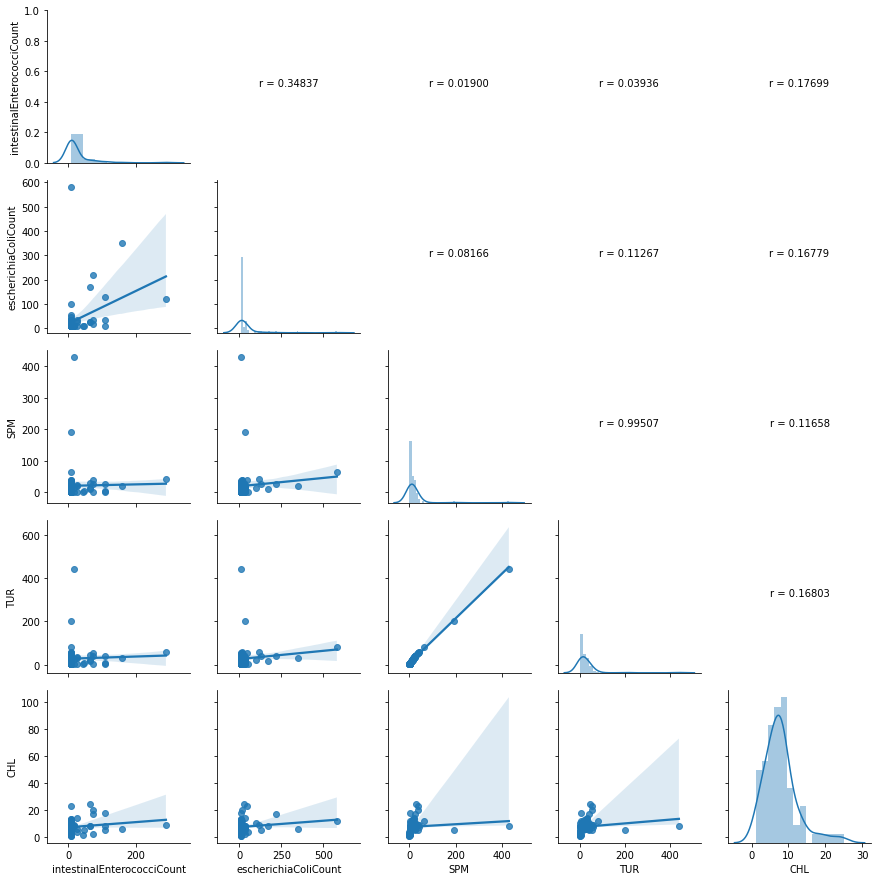

In [8]:
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.5f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

g = sns.PairGrid(df_l3)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

### Correlations(log)

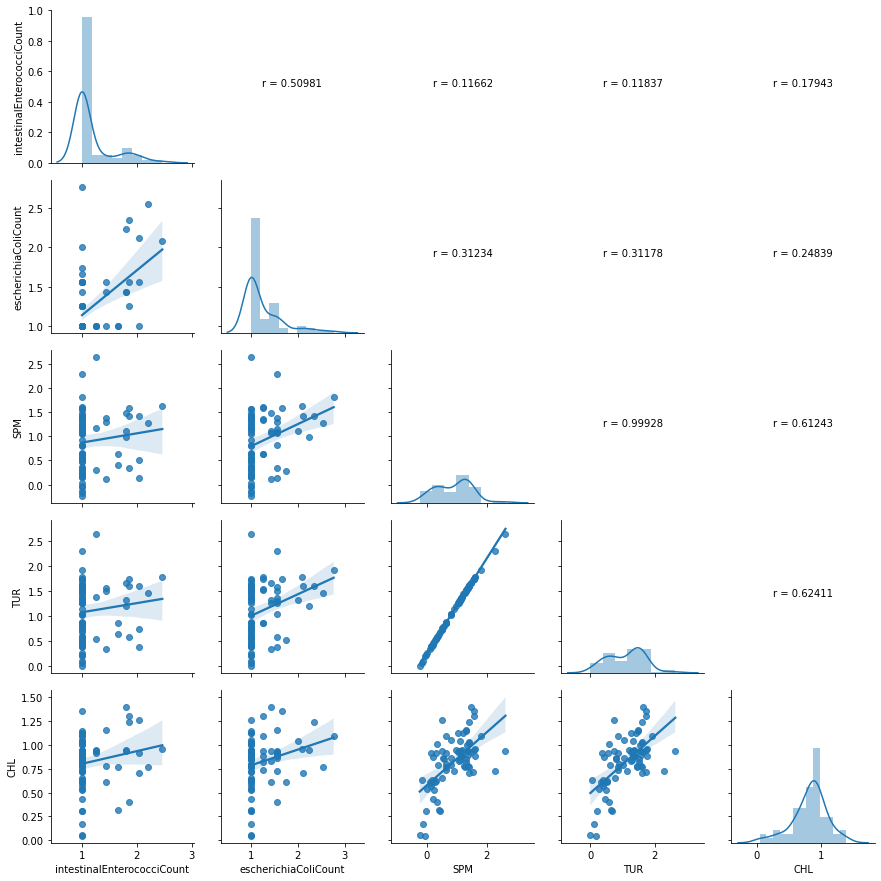

In [9]:
log_df = df_l3.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)
l = sns.PairGrid(log_df)
l.map_diag(sns.distplot)
l.map_lower(sns.regplot)
l.map_upper(reg_coef)

## Warning vs. SPM&TUR&CHL

In [10]:
riskforecasting = pd.read_csv('/content/drive/MyDrive/CapstoneProject/Datasets/Bathing_water_data/pollution_risk_forecasting.csv')
riskforecasting

,EUBWID,label,predictedAt,publishedAt,expiresAt,warning,riskLevelLabel
0,ukc1101-06000,Seaton Carew North,2022-04-28T08:30:00,2022-04-28T08:40:18,2022-04-29T08:29:00,Pollution RIsk Forecasts will start soon,normal
1,ukc1101-06000,Seaton Carew North,2022-04-29T08:30:00,2022-04-29T08:40:12,2022-04-30T08:29:00,Pollution RIsk Forecasts will start soon,normal
2,ukc1101-06000,Seaton Carew North,2022-04-30T08:30:00,2022-05-03T15:56:23,2022-05-01T08:29:00,Pollution RIsk Forecasts will start soon,normal
3,ukc1101-06000,Seaton Carew North,2022-05-04T08:30:00,2022-05-04T16:12:30,2022-05-05T08:29:00,No warnings in place,normal
4,ukc1101-06000,Seaton Carew North,2022-05-05T08:30:00,2022-05-05T08:41:41,2022-05-06T08:29:00,No warnings in place,normal
...,...,...,...,...,...,...,...
63641,ukk4307-33900,Westward Ho!,2022-09-26T08:30:00,2022-09-26T08:41:14,2022-09-27T08:29:00,No pollution incidents reported,normal
63642,ukk4307-33900,Westward Ho!,2022-09-27T08:30:00,2022-09-27T08:40:24,2022-09-28T08:29:00,No pollution incidents reported,normal
63643,ukk4307-33900,Westward Ho!,2022-09-28T08:30:00,2022-09-28T08:40:49,2022-09-29T08:29:00,No pollution incidents reported,normal
63644,ukk4307-33900,Westward Ho!,2022-09-29T08:30:00,2022-09-29T08:40:39,2022-09-30T08:29:00,No pollution incidents reported,normal


In [11]:
riskforecasting['riskLevelLabel'].value_counts()

normal       62302
increased     1344
Name: riskLevelLabel, dtype: int64

In [12]:
riskforecasting['warning'].value_counts()

No pollution incidents reported                       35853
No warnings in place                                  24855
Pollution RIsk Forecasts will start soon               1251
Advice against bathing: pollution risk warning         1088
Bathing water closed                                    302
Risk of reduced water quality due to sewage             114
Advice against bathing: pollution incident              105
Pollution incident ended, no forecast available          41
Risk of reduced water quality due to harmful algae       17
Risk of reduced water quality due to oil or fuel         10
Risk of reduced water quality due to animal waste         7
Risk of reduced water quality due to other                3
Name: warning, dtype: int64

In [13]:
riskforecasting2 = riskforecasting[['label','predictedAt','warning','riskLevelLabel']]
riskforecasting2['predictedAt'] = pd.to_datetime(riskforecasting.predictedAt).dt.strftime('%Y-%m-%d')
riskforecasting2 = riskforecasting2.rename(columns={'label': 'site', 'predictedAt': 'time'})
riskforecasting2

,site,time,warning,riskLevelLabel
0,Seaton Carew North,2022-04-28,Pollution RIsk Forecasts will start soon,normal
1,Seaton Carew North,2022-04-29,Pollution RIsk Forecasts will start soon,normal
2,Seaton Carew North,2022-04-30,Pollution RIsk Forecasts will start soon,normal
3,Seaton Carew North,2022-05-04,No warnings in place,normal
4,Seaton Carew North,2022-05-05,No warnings in place,normal
...,...,...,...,...
63641,Westward Ho!,2022-09-26,No pollution incidents reported,normal
63642,Westward Ho!,2022-09-27,No pollution incidents reported,normal
63643,Westward Ho!,2022-09-28,No pollution incidents reported,normal
63644,Westward Ho!,2022-09-29,No pollution incidents reported,normal


In [14]:
df2_l3 = pd.merge(riskforecasting2, cope2_l3, on=['site','time'])
df2_l3 = df2_l3.dropna()
df2_l3

,site,time,warning,riskLevelLabel,SPM,TUR,CHL
1,Seaton Carew North,2022-04-29,Pollution RIsk Forecasts will start soon,normal,41.126600,60.180290,11.448505
50,Seaton Carew North,2022-06-20,No warnings in place,normal,22.679785,34.822575,13.717284
53,Seaton Carew North,2022-06-23,No warnings in place,normal,2.050142,3.484428,8.296334
70,Seaton Carew North,2022-07-10,No warnings in place,normal,5.207922,8.725295,5.510527
100,Seaton Carew North,2022-08-09,No warnings in place,normal,7.116791,11.771763,5.696101
...,...,...,...,...,...,...,...
63104,Shaldon,2022-07-03,No warnings in place,normal,0.902155,1.542960,1.908623
63109,Shaldon,2022-07-08,No warnings in place,normal,0.587033,1.005328,1.128255
63139,Shaldon,2022-08-07,No warnings in place,normal,0.836071,1.430170,3.891465
63379,Hartland Quay,2022-06-06,No pollution incidents reported,normal,0.676724,1.158486,4.287363


### Hist of each warning type in SPM/TUR/CHL

In [15]:
df2_l3['warning'].value_counts()

No pollution incidents reported                    309
No warnings in place                               282
Pollution RIsk Forecasts will start soon            14
Advice against bathing: pollution risk warning       6
Bathing water closed                                 3
Pollution incident ended, no forecast available      1
Name: warning, dtype: int64

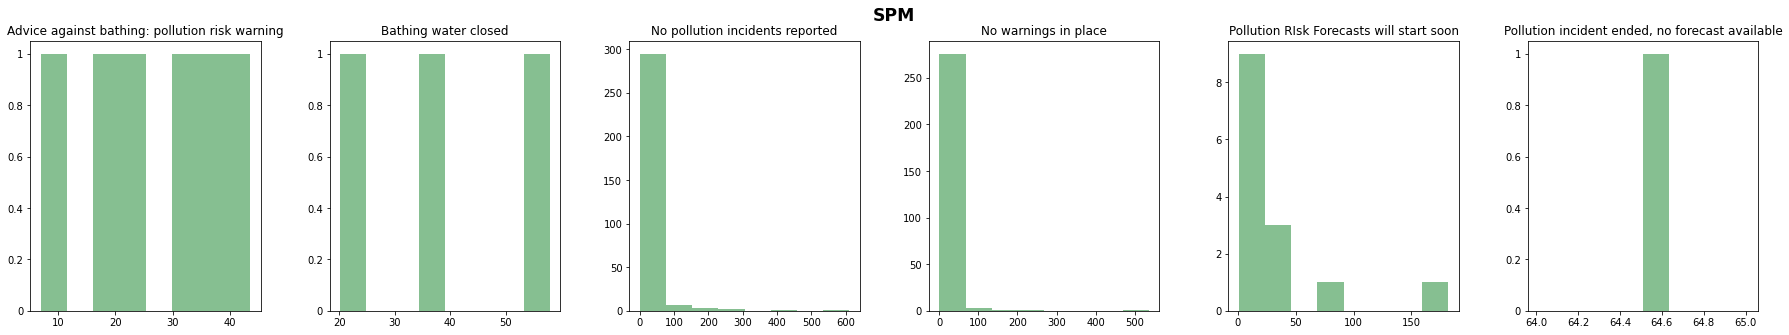

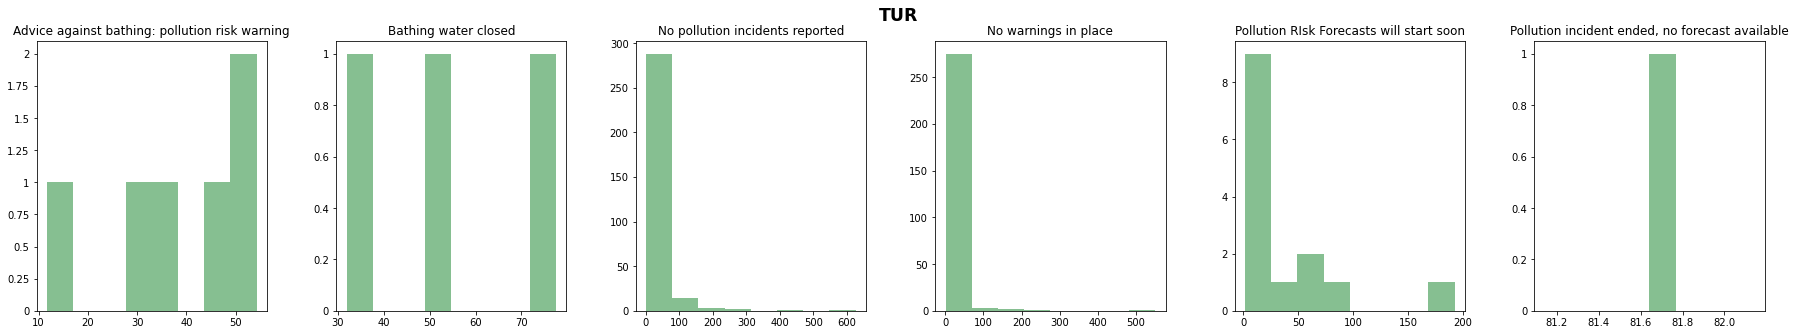

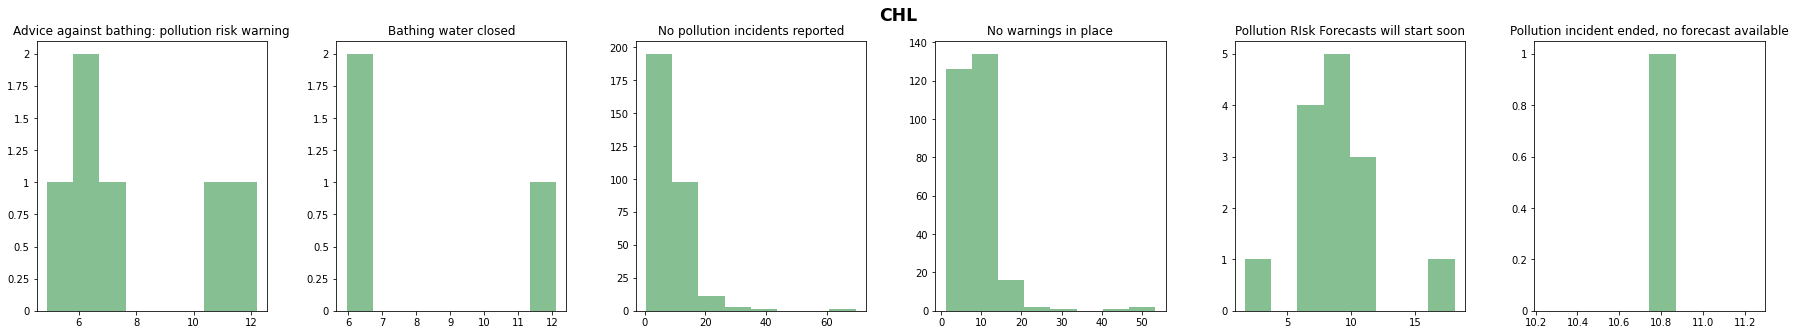

In [16]:
for i in ['SPM','TUR','CHL']:

  df_i = df2_l3[[i,'warning']]
  
  fig, axes = plt.subplots(figsize=(30,5))
  ax = df_i.hist(column=i, by='warning', ax=axes, bins=8, color='#86bf91', layout=(1,6))

  fig.text(0.49, 0.97, i, va='center',size='xx-large', weight='bold')

  for x in ax:
    plt.setp(x.get_xticklabels(), rotation=0)
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


### Hist of each warning type in SPM/TUR/CHL(log)

In [18]:
log_df2 = df2_l3
log_df2_l3[['SPM','TUR','CHL']] = log_df2[['SPM','TUR','CHL']].apply(np.log)
log_df2_l3

,site,time,warning,riskLevelLabel,SPM,TUR,CHL
1,Seaton Carew North,2022-04-29,Pollution RIsk Forecasts will start soon,normal,3.716655,4.097345,2.437859
50,Seaton Carew North,2022-06-20,No warnings in place,normal,3.121474,3.550266,2.618657
53,Seaton Carew North,2022-06-23,No warnings in place,normal,0.717909,1.248304,2.115814
70,Seaton Carew North,2022-07-10,No warnings in place,normal,1.650181,2.166226,1.706660
100,Seaton Carew North,2022-08-09,No warnings in place,normal,1.962457,2.465704,1.739782
...,...,...,...,...,...,...,...
63104,Shaldon,2022-07-03,No warnings in place,normal,-0.102969,0.433703,0.646382
63109,Shaldon,2022-07-08,No warnings in place,normal,-0.532674,0.005314,0.120672
63139,Shaldon,2022-08-07,No warnings in place,normal,-0.179042,0.357793,1.358786
63379,Hartland Quay,2022-06-06,No pollution incidents reported,normal,-0.390492,0.147114,1.455672


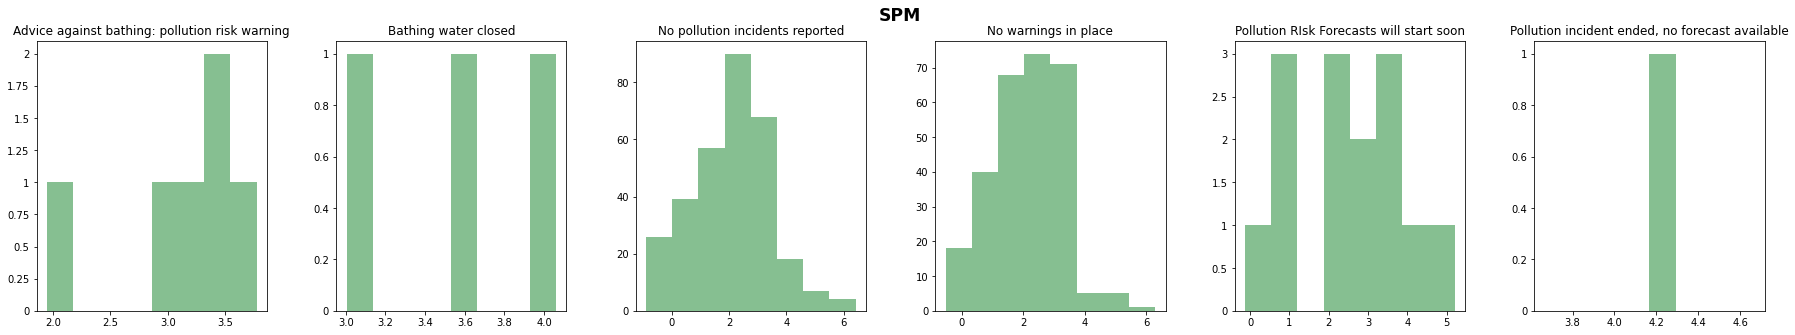

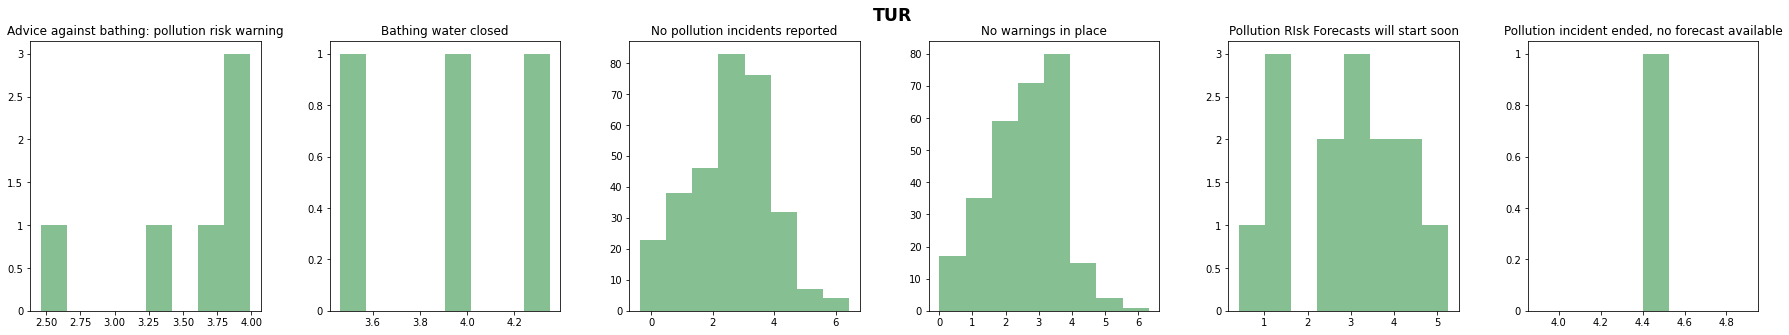

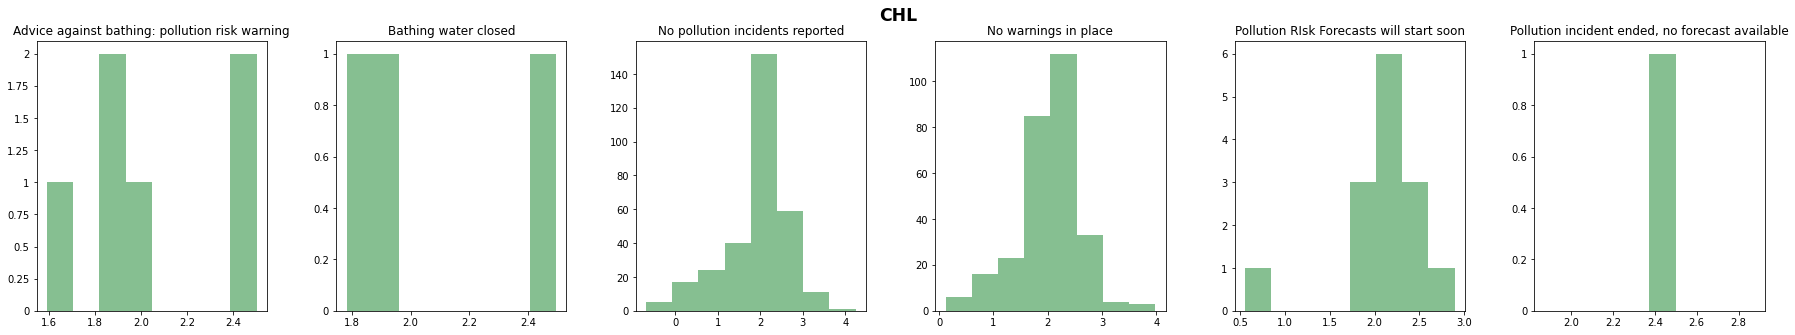

In [19]:
for i in ['SPM','TUR','CHL']:

  df_i = log_df2_l3[[i,'warning']]
  
  fig, axes = plt.subplots(figsize=(30,5))
  ax = df_i.hist(column=i, by='warning', ax=axes, bins=8, color='#86bf91', layout=(1,6))

  fig.text(0.49, 0.97, i, va='center',size='xx-large', weight='bold')

  for x in ax:
    plt.setp(x.get_xticklabels(), rotation=0)
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


### Hist of each risk level in SPM/TUR/CHL

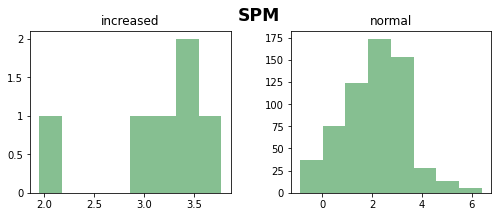

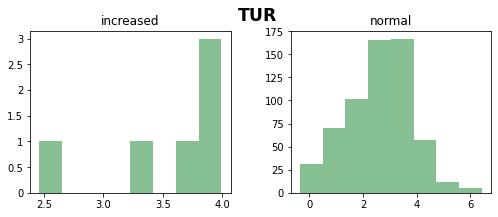

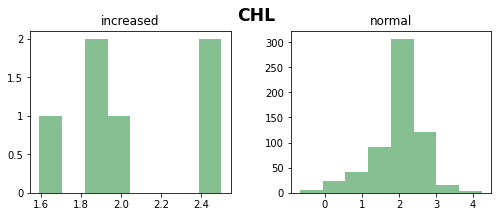

In [20]:
for i in ['SPM','TUR','CHL']:

  df_i = df2_l3[[i,'riskLevelLabel']]
  
  fig, axes = plt.subplots(figsize=(8,3))
  ax = df_i.hist(column=i, by='riskLevelLabel', ax=axes, bins=8, color='#86bf91', layout=(1,2))

  fig.text(0.46, 0.97, i, va='center',size='xx-large', weight='bold')

  for x in ax:
    plt.setp(x.get_xticklabels(), rotation=0)
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


# L4

## Bacteria&Ecoli count vs. SPM&TUR&CHL(L4)

In [21]:
cope_l4 = pd.read_csv('/content/drive/MyDrive/CapstoneProject/Datasets/copernicus_data_nrt_l4.csv')
cope2_l4 = cope_l4[["site","time","SPM","TUR","CHL"]]
cope2_l4

,site,time,SPM,TUR,CHL
0,Seaton Carew North,2022-01-03,NaN,NaN,NaN
1,Seaton Carew North,2022-01-04,15.024445,24.266914,9.183625
2,Seaton Carew North,2022-01-05,NaN,NaN,NaN
3,Seaton Carew North,2022-01-06,NaN,NaN,NaN
4,Seaton Carew North,2022-01-07,NaN,NaN,NaN
...,...,...,...,...,...
120825,Westward Ho!,2022-10-25,NaN,NaN,NaN
120826,Westward Ho!,2022-10-26,NaN,NaN,NaN
120827,Westward Ho!,2022-10-29,NaN,NaN,NaN
120828,Westward Ho!,2022-10-30,NaN,NaN,NaN


In [22]:
df_l4 = pd.merge(sample2, cope2_l4, on=['site','time'])
df_l4 = df_l4.dropna()
df_l4

,site,time,intestinalEnterococciCount,escherichiaColiCount,SPM,TUR,CHL
1,Seaton Carew North,2022-05-19,45,10,10.335602,16.668087,11.645728
3,Seaton Carew North,2022-05-31,10,10,2.788016,4.778587,8.509363
4,Seaton Carew North,2022-06-08,250,270,0.974277,1.720897,8.066384
5,Seaton Carew North,2022-06-23,18,10,3.691690,6.155658,6.110140
7,Seaton Carew North,2022-07-05,170,10,8.476042,14.067277,9.988262
...,...,...,...,...,...,...,...
7065,Shaldon,2022-07-13,27,18,0.760915,1.303267,2.160734
7098,Hartland Quay,2022-06-06,10,10,0.678526,1.161966,3.882124
7099,Hartland Quay,2022-06-23,10,10,0.686622,1.176087,3.879461
7100,Hartland Quay,2022-07-08,10,10,0.846511,1.445615,2.330362


In [23]:
df_l4 = pd.merge(sample2, cope2_l4, on=['site','time'])
df_l4 = df_l4.dropna()
df_l4

,site,time,intestinalEnterococciCount,escherichiaColiCount,SPM,TUR,CHL
1,Seaton Carew North,2022-05-19,45,10,10.335602,16.668087,11.645728
3,Seaton Carew North,2022-05-31,10,10,2.788016,4.778587,8.509363
4,Seaton Carew North,2022-06-08,250,270,0.974277,1.720897,8.066384
5,Seaton Carew North,2022-06-23,18,10,3.691690,6.155658,6.110140
7,Seaton Carew North,2022-07-05,170,10,8.476042,14.067277,9.988262
...,...,...,...,...,...,...,...
7065,Shaldon,2022-07-13,27,18,0.760915,1.303267,2.160734
7098,Hartland Quay,2022-06-06,10,10,0.678526,1.161966,3.882124
7099,Hartland Quay,2022-06-23,10,10,0.686622,1.176087,3.879461
7100,Hartland Quay,2022-07-08,10,10,0.846511,1.445615,2.330362


### Correlations

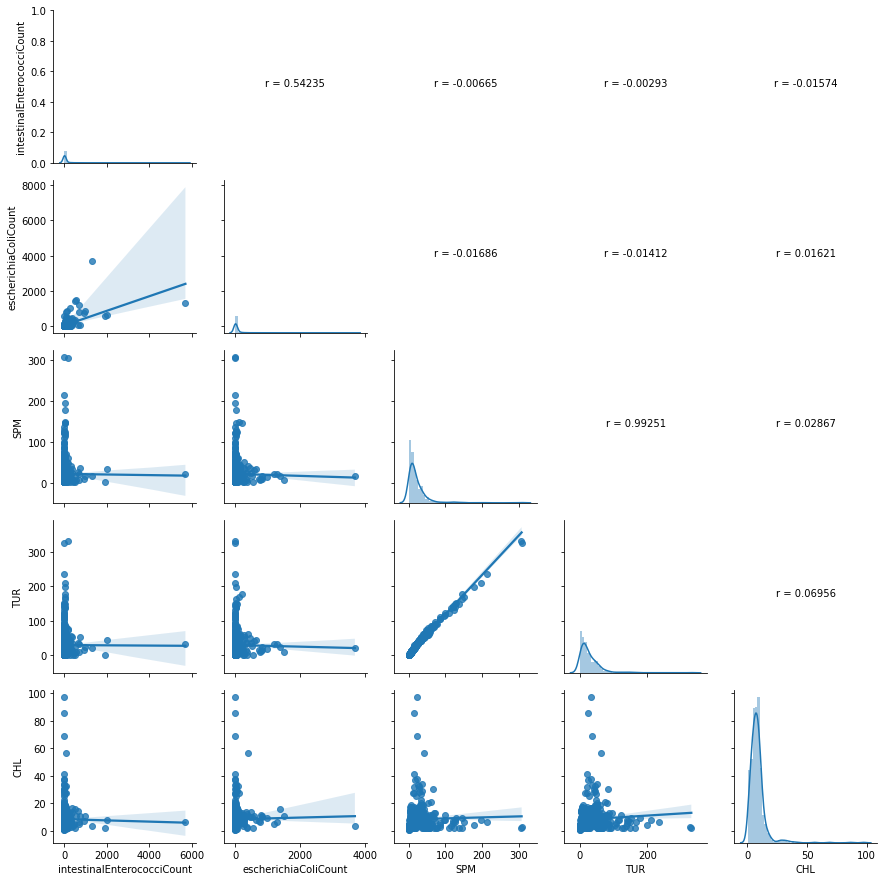

In [24]:
g = sns.PairGrid(df_l4)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

### Correlations(log)

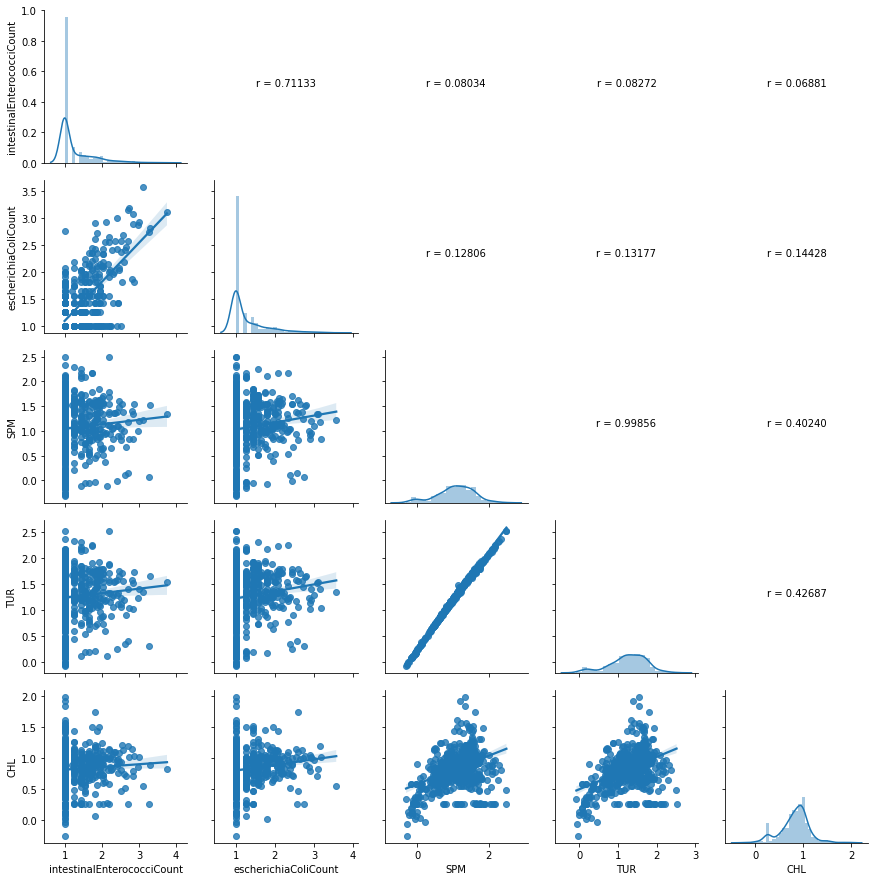

In [25]:
log_df_l4 = df_l4.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)
l = sns.PairGrid(log_df_l4)
l.map_diag(sns.distplot)
l.map_lower(sns.regplot)
l.map_upper(reg_coef)

## Warning vs. SPM&TUR&CHL

In [26]:
df2_l4 = pd.merge(riskforecasting2, cope2_l4, on=['site','time'])
df2_l4 = df2_l4.dropna()
df2_l4

,site,time,warning,riskLevelLabel,SPM,TUR,CHL
1,Seaton Carew North,2022-04-29,Pollution RIsk Forecasts will start soon,normal,25.661331,37.658855,9.443084
3,Seaton Carew North,2022-05-04,No warnings in place,normal,16.239918,24.976324,9.984290
13,Seaton Carew North,2022-05-14,No warnings in place,normal,8.327272,13.482300,12.682308
15,Seaton Carew North,2022-05-16,Advice against bathing: pollution risk warning,increased,9.625257,15.518951,12.746754
18,Seaton Carew North,2022-05-19,No warnings in place,normal,10.335602,16.668087,11.645728
...,...,...,...,...,...,...,...
62595,Hartland Quay,2022-08-12,No pollution incidents reported,normal,0.845388,1.444480,2.318278
62600,Hartland Quay,2022-08-17,No pollution incidents reported,normal,0.843118,1.440889,2.294312
62607,Hartland Quay,2022-08-25,No pollution incidents reported,normal,0.847636,1.448276,2.358512
62609,Hartland Quay,2022-08-27,No pollution incidents reported,normal,0.845000,1.444237,2.366051


### Hist of each warning type in SPM/TUR/CHL

In [27]:
df2_l4['warning'].value_counts()

No pollution incidents reported                      3055
No warnings in place                                 2290
Pollution RIsk Forecasts will start soon               94
Advice against bathing: pollution risk warning         82
Bathing water closed                                   22
Advice against bathing: pollution incident              5
Risk of reduced water quality due to sewage             3
Pollution incident ended, no forecast available         2
Risk of reduced water quality due to animal waste       1
Name: warning, dtype: int64

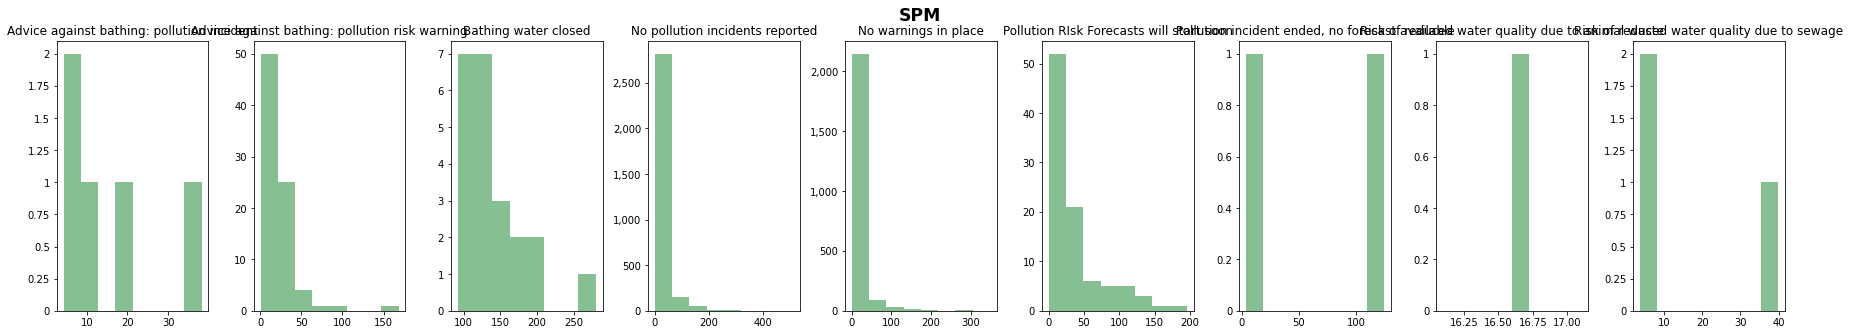

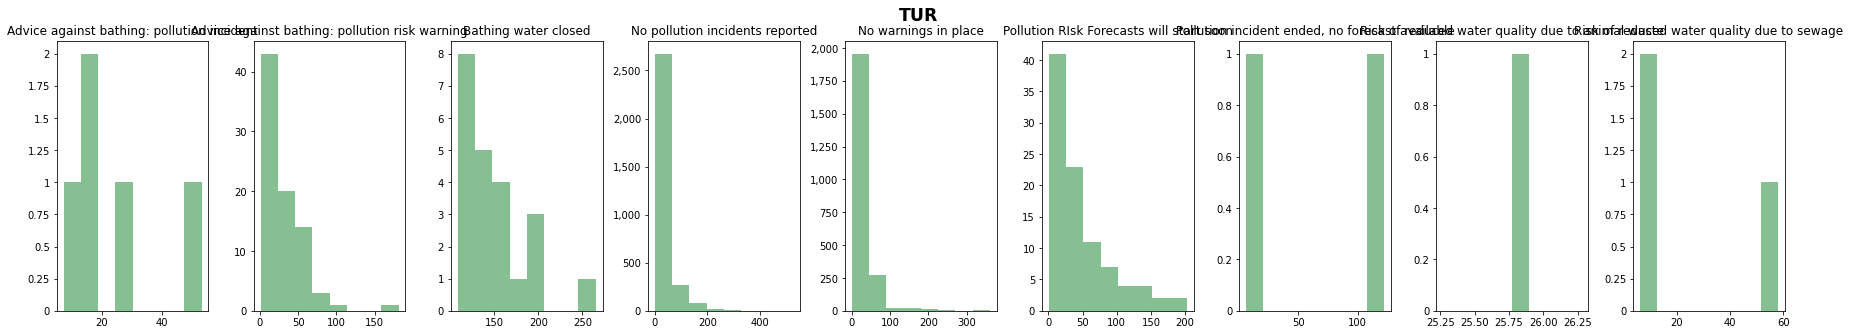

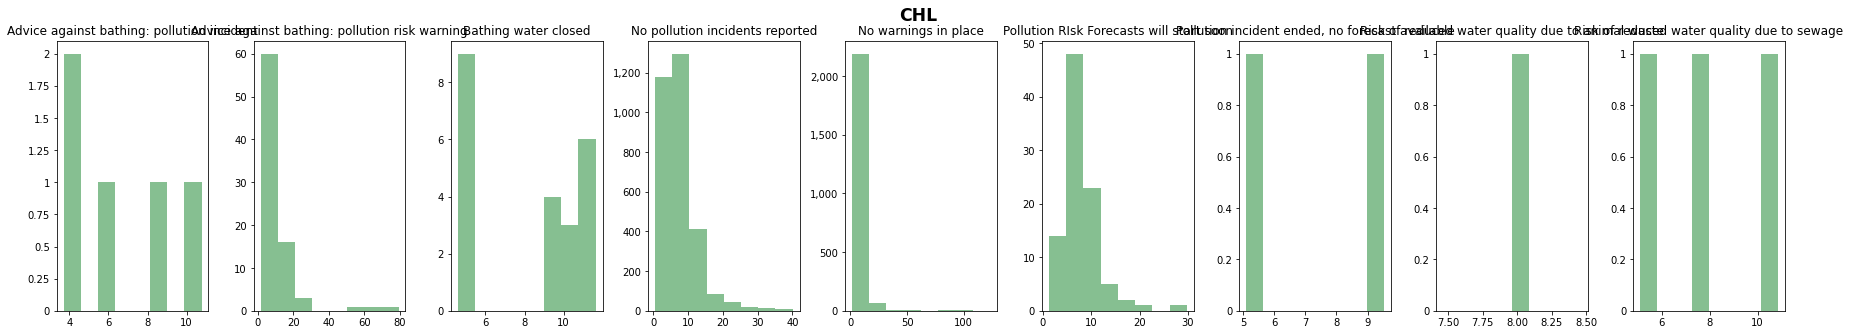

In [29]:
for i in ['SPM','TUR','CHL']:

  df_i = df2_l4[[i,'warning']]
  
  fig, axes = plt.subplots(figsize=(30,5))
  ax = df_i.hist(column=i, by='warning', ax=axes, bins=8, color='#86bf91', layout=(1,9))

  fig.text(0.49, 0.97, i, va='center',size='xx-large', weight='bold')

  for x in ax:
    plt.setp(x.get_xticklabels(), rotation=0)
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


### Hist of each warning type in SPM/TUR/CHL(log)

In [30]:
log_df2_l4 = df2_l4
log_df2_l4[['SPM','TUR','CHL']] = log_df2_l4[['SPM','TUR','CHL']].apply(np.log)
log_df2_l4

,site,time,warning,riskLevelLabel,SPM,TUR,CHL
1,Seaton Carew North,2022-04-29,Pollution RIsk Forecasts will start soon,normal,3.244985,3.628568,2.245283
3,Seaton Carew North,2022-05-04,No warnings in place,normal,2.787472,3.217928,2.301013
13,Seaton Carew North,2022-05-14,No warnings in place,normal,2.119536,2.601378,2.540208
15,Seaton Carew North,2022-05-16,Advice against bathing: pollution risk warning,increased,2.264391,2.742062,2.545277
18,Seaton Carew North,2022-05-19,No warnings in place,normal,2.335594,2.813496,2.454939
...,...,...,...,...,...,...,...
62595,Hartland Quay,2022-08-12,No pollution incidents reported,normal,-0.167960,0.367749,0.840824
62600,Hartland Quay,2022-08-17,No pollution incidents reported,normal,-0.170648,0.365261,0.830433
62607,Hartland Quay,2022-08-25,No pollution incidents reported,normal,-0.165304,0.370374,0.858031
62609,Hartland Quay,2022-08-27,No pollution incidents reported,normal,-0.168419,0.367581,0.861222


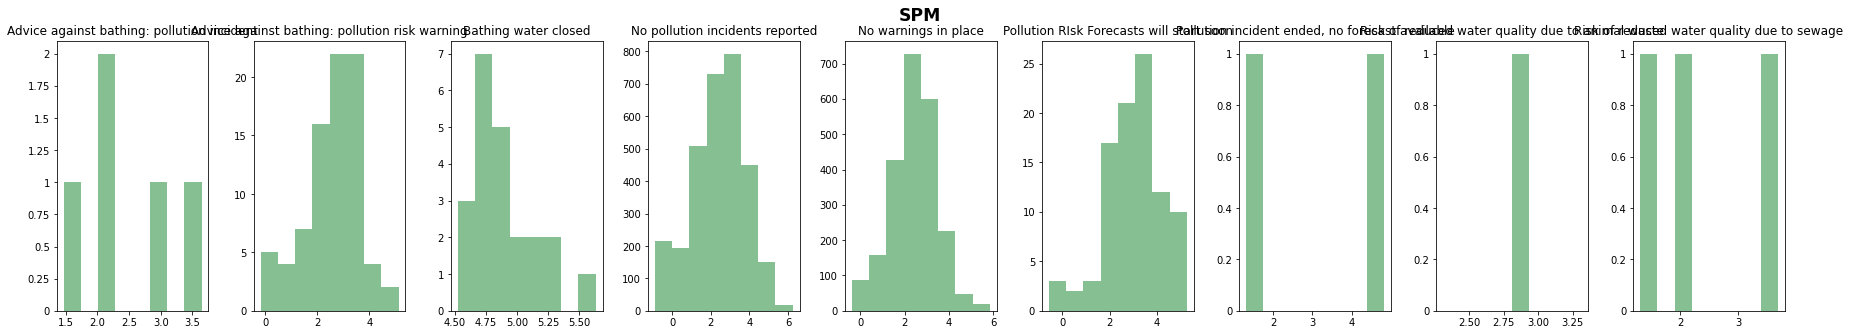

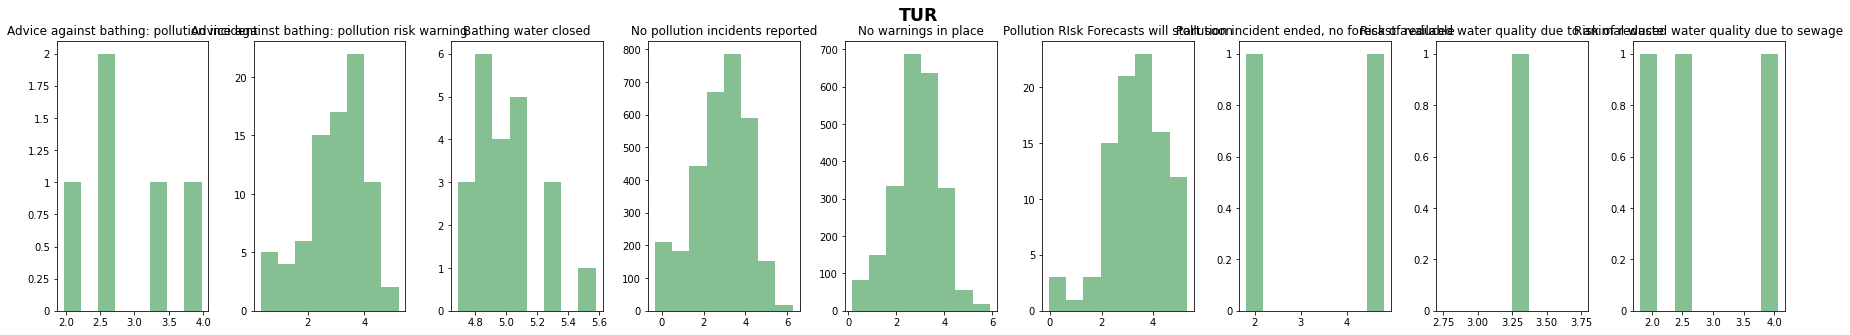

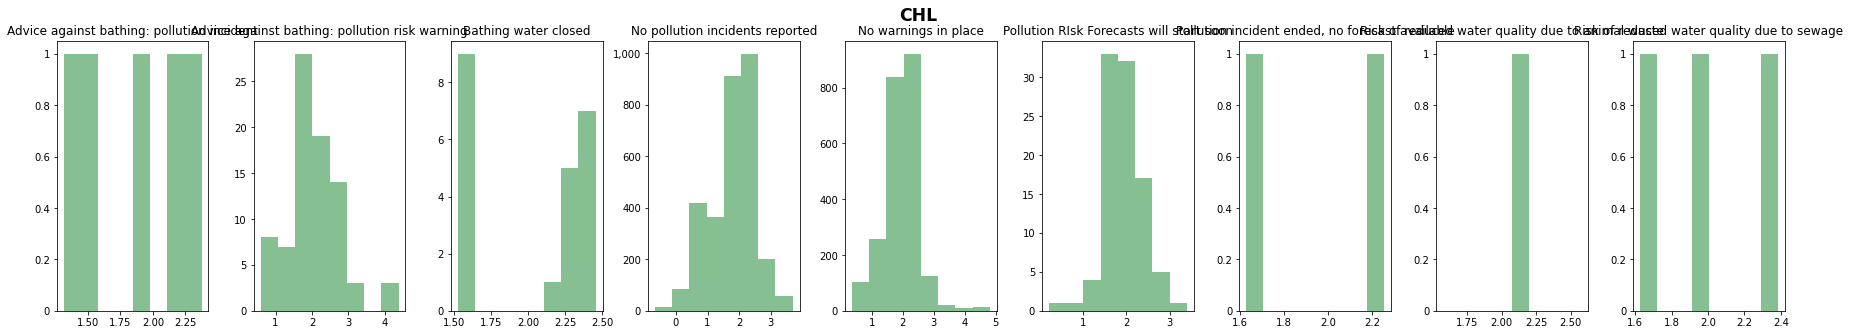

In [32]:
for i in ['SPM','TUR','CHL']:

  df_i = log_df2_l4[[i,'warning']]
  
  fig, axes = plt.subplots(figsize=(30,5))
  ax = df_i.hist(column=i, by='warning', ax=axes, bins=8, color='#86bf91', layout=(1,9))

  fig.text(0.49, 0.97, i, va='center',size='xx-large', weight='bold')

  for x in ax:
    plt.setp(x.get_xticklabels(), rotation=0)
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


### Hist of each risk level in SPM/TUR/CHL

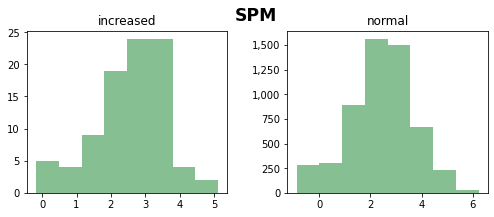

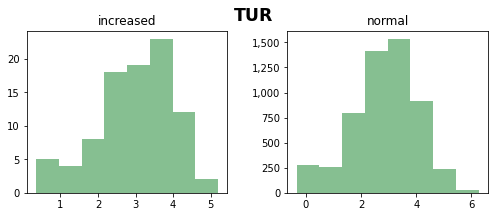

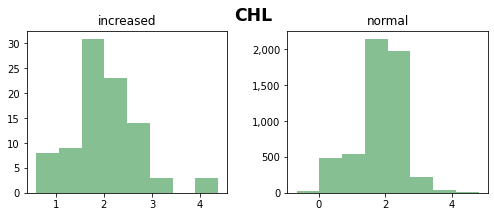

In [33]:
for i in ['SPM','TUR','CHL']:

  df_i = df2_l4[[i,'riskLevelLabel']]
  
  fig, axes = plt.subplots(figsize=(8,3))
  ax = df_i.hist(column=i, by='riskLevelLabel', ax=axes, bins=8, color='#86bf91', layout=(1,2))

  fig.text(0.46, 0.97, i, va='center',size='xx-large', weight='bold')

  for x in ax:
    plt.setp(x.get_xticklabels(), rotation=0)
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
